In [2]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd

### Creating a deep learning network

A deep convolutional neural network is a network that has more than one layer. Each layer in a deep network receives its input from the preceding layer, with the very first layer receiving its input from the images used as training or test data.

Here, you will create a network that has two convolutional layers.
* Instructions

    * The first convolutional layer is the input layer of the network. This should have 15 units with kernels of 2 by 2 pixels. It should have a 'relu' activation function. It can use the variables img_rows and img_cols to define its input_shape.
    * The second convolutional layer receives its inputs from the first layer. It should have 5 units with kernels of 2 by 2 pixels. It should also have a 'relu' activation function.


In [3]:
img_rows, img_cols = 28, 28

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

model = Sequential()

# Add a convolutional layer (15 units)
model.add(Conv2D(15, kernel_size=2, activation='relu', input_shape=(img_cols, img_rows, 1)))


# Add another convolutional layer (5 units)
model.add(Conv2D(5, kernel_size=2, activation='relu'))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

2021-12-21 23:16:04.892504: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-21 23:16:04.892542: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-21 23:16:04.892575: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Rabie): /proc/driver/nvidia/version does not exist
2021-12-21 23:16:04.892752: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
(train_data, train_labels), \
                    (test_data, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

In [9]:
train_data = train_data[(train_labels >= 0)\
                        & (train_labels < 3)][0:50].reshape(-1, 28, 28, 1)
train_labels = train_labels[(train_labels >= 0) & (train_labels < 3)][0:50]
train_labels = pd.get_dummies(train_labels).to_numpy()

In [10]:
test_data = test_data[(test_labels >= 0) & (test_labels < 3)][0:10].reshape(-1, 28, 28, 1)
test_labels = test_labels[(test_labels >= 0) & (test_labels < 3)][0:10]
test_labels = pd.get_dummies(test_labels).to_numpy()

### Train a deep CNN to classify clothing images

Training a deep learning model is very similar to training a single layer network. Once the model is constructed (as you have done in the previous exercise), the model needs to be compiled with the right set of parameters. Then, the model is fit by providing it with training data, as well as training labels. After training is done, the model can be evaluated on test data.

The model you built in the previous exercise is available in your workspace.
* Instructions

    * Compile the model to use the categorical cross-entropy loss function and the Adam optimizer.
    * Train the network with train_data for 3 epochs with batches of 10 images each.
    * Use randomly selected 20% of the training data as validation data during training.
    * Evaluate the model with test_data, use a batch size of 10.


In [11]:
# Compile model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fit the model to training data 
model.fit(train_data, train_labels, 
          validation_split=0.2, 
          epochs=3, batch_size=10)

# Evaluate the model on test data
model.evaluate(test_data, test_labels, batch_size=10)

2021-12-21 23:18:09.005722: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-12-21 23:18:09.006323: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2394475000 Hz


Epoch 1/3
4/4 [==============================] - 19s 209ms/step - loss: 35.7134 - accuracy: 0.2733 - val_loss: 11.3968 - val_accuracy: 0.5000
Epoch 2/3
4/4 [==============================] - 0s 28ms/step - loss: 3.4703 - accuracy: 0.8033 - val_loss: 2.3955 - val_accuracy: 0.9000
Epoch 3/3
1/1 [==============================] - 0s 33ms/step - loss: 5.5758 - accuracy: 0.9000


[5.575758457183838, 0.8999999761581421]

### How many parameters in a deep CNN?

In this exercise, you will use Keras to calculate the total number of parameters along with the number of parameters in each layer of the network.

We have already provided code that builds a deep CNN for you.

In [12]:
# CNN model
model1 = Sequential()
model1.add(Conv2D(10, kernel_size=2, activation='relu', 
                 input_shape=(28, 28, 1)))
model1.add(Conv2D(10, kernel_size=2, activation='relu'))
model1.add(Flatten())
model1.add(Dense(3, activation='softmax'))

# Summarize the model 
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 27, 27, 10)        50        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 10)        410       
_________________________________________________________________
flatten_1 (Flatten)          (None, 6760)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 20283     
Total params: 20,743
Trainable params: 20,743
Non-trainable params: 0
_________________________________________________________________


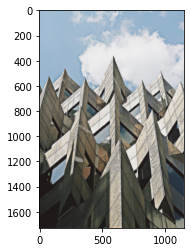

In [15]:
# Import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Load the image
im = plt.imread('../building_image.jpg')

# Display the image
plt.imshow(im)
plt.show()

In [21]:
# Result placeholder
result = np.zeros((im.shape[0]//2, im.shape[1]//2))

# Pooling operation
for ii in range(result.shape[0]):
    for jj in range(result.shape[1]):
        result[ii, jj] = np.max(im[ii*2:ii*2+2, jj*2:jj*2+2])

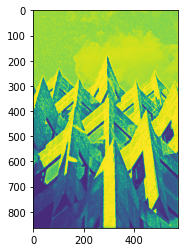

In [22]:
# Display the image
plt.imshow(result)
plt.show()

In [23]:
print(result.shape, im.shape)

(864, 576) (1728, 1152, 3)


### Keras pooling layers

Keras implements a pooling operation as a layer that can be added to CNNs between other layers. In this exercise, you will construct a convolutional neural network similar to the one you have constructed before:

Convolution => Convolution => Flatten => Dense

However, you will also add a pooling layer. The architecture will add a single max-pooling layer between the convolutional layer and the dense layer with a pooling of 2x2:

Convolution => Max pooling => Convolution => Flatten => Dense

A Sequential model along with Dense, Conv2D, Flatten, and MaxPool2D objects are available in your workspace.
* Instructions

    * Add an input convolutional layer (15 units, kernel size of 2, relu activation).
    * Add a maximum pooling operation (pooling over windows of size 2x2).
    * Add another convolution layer (5 units, kernel size of 2, relu activation).
    * Flatten the output of the second convolution and add a Dense layer for output (3 categories, softmax activation).



In [26]:
from keras.layers import MaxPool2D
model2 = Sequential()

# Add a convolutional layer
model2.add(Conv2D(15, kernel_size=2, activation='relu', 
                 input_shape=(img_rows, img_cols, 1)))

# Add a pooling operation
model2.add(MaxPool2D(2))

# Add another convolutional layer
model2.add(Conv2D(5, kernel_size=2, activation='relu'))

# Flatten and feed to output layer
model2.add(Flatten())
model2.add(Dense(3, activation='softmax'))
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 27, 27, 15)        75        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 15)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 5)         305       
_________________________________________________________________
flatten_2 (Flatten)          (None, 720)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 2163      
Total params: 2,543
Trainable params: 2,543
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Compile model
model2.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fit the model to training data 
model2.fit(train_data, train_labels, 
          validation_split=0.2, 
          epochs=3, batch_size=10)

# Evaluate the model on test data
model2.evaluate(test_data, test_labels, batch_size=10)

Epoch 1/3
4/4 [==============================] - 1s 138ms/step - loss: 51.5676 - accuracy: 0.1967 - val_loss: 14.9385 - val_accuracy: 0.2000
Epoch 2/3
4/4 [==============================] - 0s 21ms/step - loss: 11.7679 - accuracy: 0.3900 - val_loss: 6.3558 - val_accuracy: 0.5000
Epoch 3/3
1/1 [==============================] - 0s 24ms/step - loss: 0.0411 - accuracy: 1.0000


[0.041098371148109436, 1.0]